In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report
from sklearn.preprocessing import LabelBinarizer

# Function to calculate Dew Point
def calculate_dew_point(temperature, humidity):
    return temperature - (100 - humidity) / 5.0

# Function to calculate Heat Index
def calculate_heat_index(temperature, humidity):
    temp_celsius = (temperature - 32.0) * 5.0 / 9.0
    heat_index = -42.379 + 2.04901523 * temp_celsius + 10.14333127 * humidity - 0.22475541 * temp_celsius * humidity - 0.00683783 * temp_celsius * temp_celsius - 0.05481717 * humidity * humidity + 0.00122874 * temp_celsius * temp_celsius * humidity + 0.00085282 * temp_celsius * humidity * humidity - 0.00000199 * temp_celsius * temp_celsius * humidity * humidity
    return heat_index

# Generate 200 random data rows with controlled accuracy
np.random.seed(42)  # Set seed for reproducibility
data = {
    'Temp (Celsius)': np.random.uniform(18, 30, 200),
    'Moisture (%)': np.random.uniform(40, 70, 200),
}

# Calculate Dew Point and Heat Index using arrays
data['Dew Point'] = calculate_dew_point(data['Temp (Celsius)'], data['Moisture (%)'])
data['Heat Index'] = calculate_heat_index(data['Temp (Celsius)'], data['Moisture (%)'])

# Add Pump State with approximately 70% accuracy
accuracy_threshold = 0.7
pump_state_random = np.random.rand(200)
data['Pump State'] = np.where(pump_state_random <= accuracy_threshold, 'ON', 'OFF')

# Create a DataFrame
df = pd.DataFrame(data)

# Save to Excel file
df.to_excel('sensor_data_accuracy_70.xlsx', index=False)
print("Data saved to sensor_data_accuracy_70.xlsx")




Data saved to sensor_data_accuracy_70.xlsx


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_excel('sensor_data_accuracy_70.xlsx')

# Descriptive Analytics
print("Descriptive Analytics:")
print(df.describe())

Descriptive Analytics:
       Temp (Celsius)  Moisture (%)   Dew Point  Heat Index
count      200.000000    200.000000  200.000000  200.000000
mean        23.808075     55.131254   14.834326  382.369954
std          3.538697      8.790036    3.908764   45.668613
min         18.066265     40.151848    6.308385  289.091112
25%         20.742989     47.843875   12.152183  345.170574
50%         23.933835     56.249196   14.503211  386.193418
75%         27.082315     62.265979   18.205678  418.118918
max         29.842643     69.715154   22.380807  469.697794



More Diagnostic Analytics:


<ipython-input-26-c49d4f9ad78a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


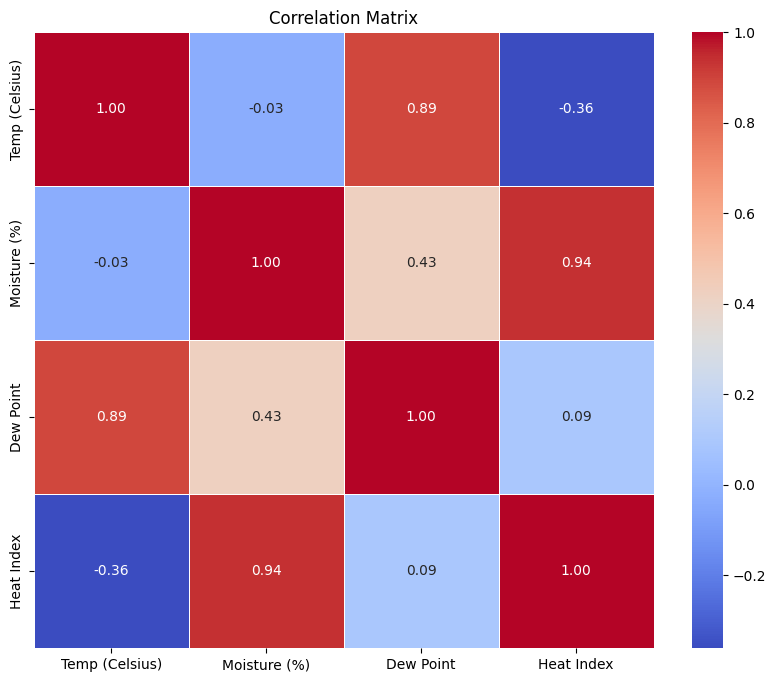

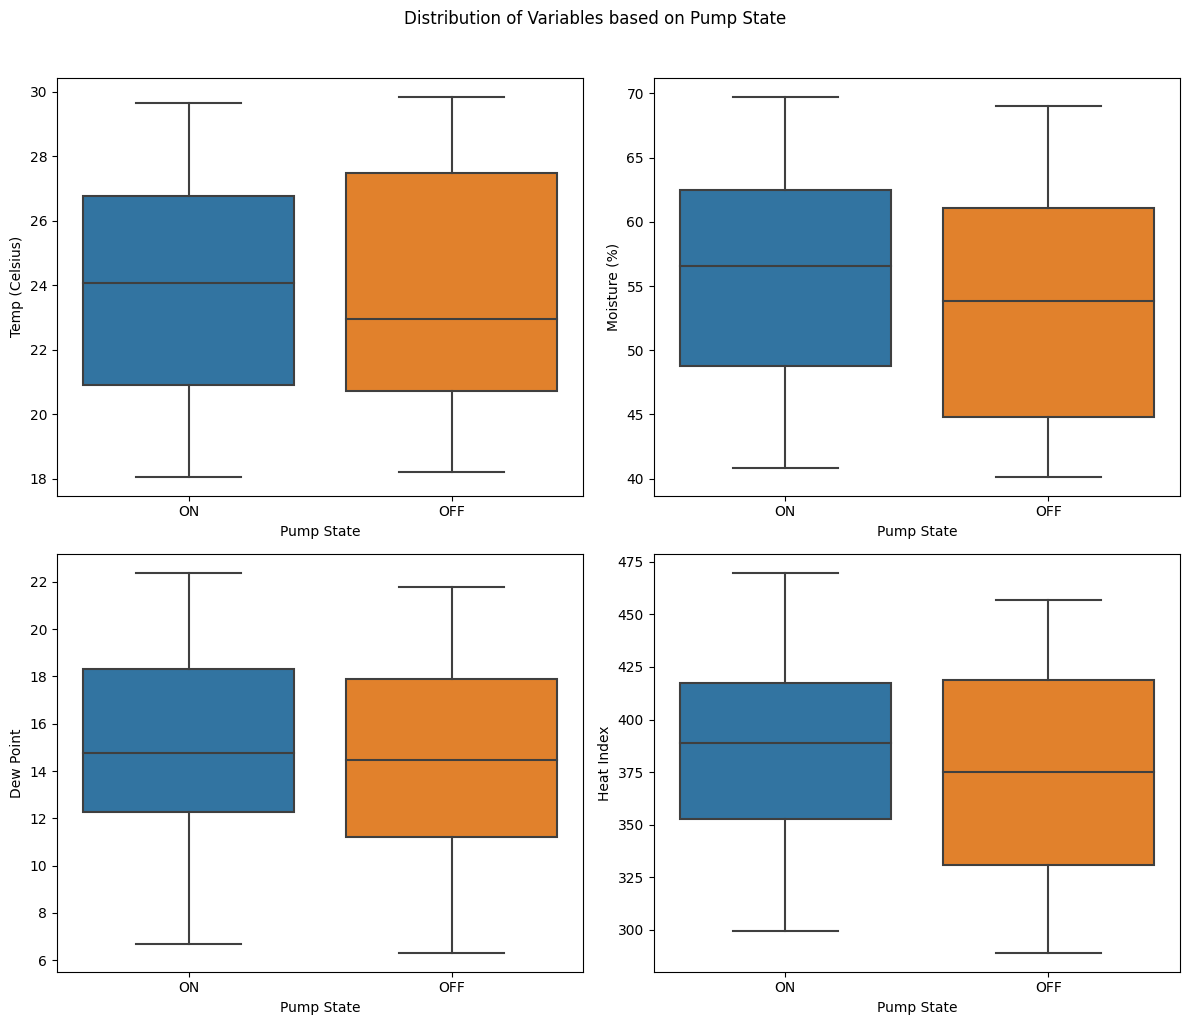

In [26]:
#Diagnostic Analytics
print("\nMore Diagnostic Analytics:")

# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Distribution of variables based on 'Pump State'
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Distribution of Variables based on Pump State', y=1.02)

sns.boxplot(x='Pump State', y='Temp (Celsius)', data=df, ax=axes[0, 0])
sns.boxplot(x='Pump State', y='Moisture (%)', data=df, ax=axes[0, 1])
sns.boxplot(x='Pump State', y='Dew Point', data=df, ax=axes[1, 0])
sns.boxplot(x='Pump State', y='Heat Index', data=df, ax=axes[1, 1])

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-27-a2d2b75d7489>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare = compare.append({
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-27-a2d2b75d7489>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare = compare.append({
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:2

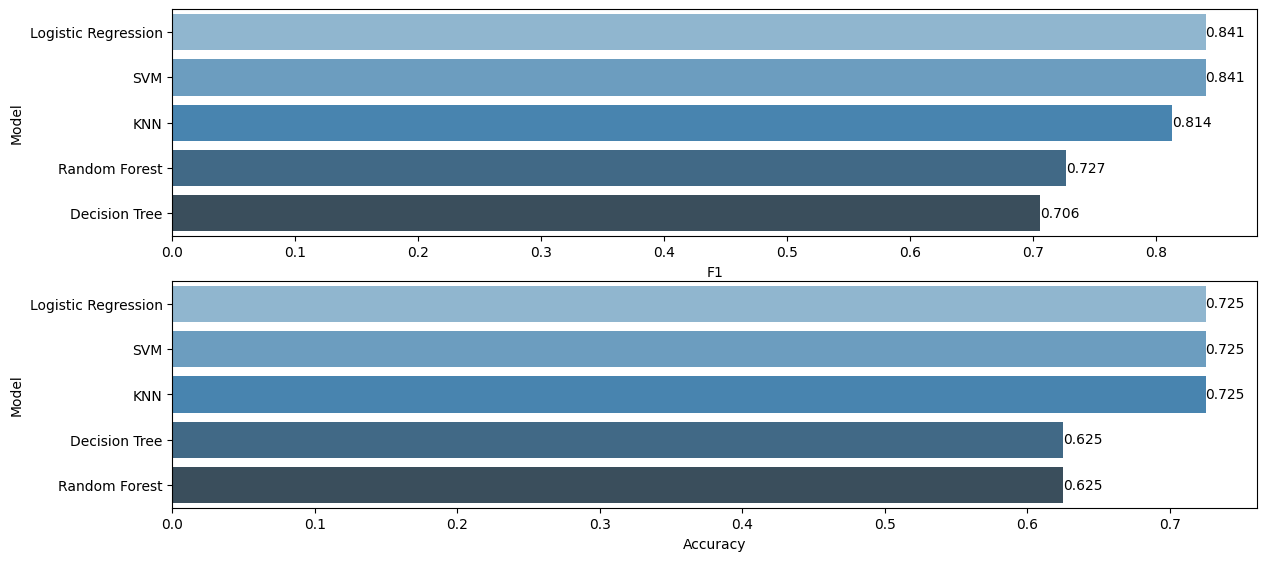

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelBinarizer

# Load the data
# Assuming your data is loaded into the 'df' DataFrame

# Define features (X) and target variable (y)
X = df[['Temp (Celsius)', 'Moisture (%)', 'Dew Point', 'Heat Index']]
y = df['Pump State']

# Encode 'ON' as 1 and 'OFF' as 0
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train multiple classifiers
logistic_regression = LogisticRegression(random_state=42)
svm_classifier = SVC(random_state=42)
knn_classifier = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

classifiers = {
    "Logistic Regression": logistic_regression,
    "SVM": svm_classifier,
    "KNN": knn_classifier,
    "Decision Tree": decision_tree,
    "Random Forest": random_forest
}

# Compare models
compare = pd.DataFrame({"Model": [], "F1": [], "Accuracy": []})

for model_name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    compare = compare.append({
        "Model": model_name,
        "F1": f1,
        "Accuracy": accuracy
    }, ignore_index=True)

# Visualization
def labels(ax):
    for p in ax.patches:
        width = p.get_width()
        ax.text(width, p.get_y() + p.get_height() / 2, '{:1.3f}'.format(width),
                ha='left', va='center')

plt.figure(figsize=(14, 10))

plt.subplot(311)
compare_f1 = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare_f1, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare_accuracy = compare.sort_values(by="Accuracy", ascending=False)
ax = sns.barplot(x="Accuracy", y="Model", data=compare_accuracy, palette="Blues_d")
labels(ax)

plt.show()
